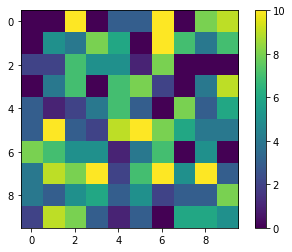

In [34]:
import random
environment = [[0] * 10 for _ in range(10)]
old_id = [0, 0]
old_environment = 0
param = 1

for i in range(10):
    for j in range(10):
        id = [i//param, j//param]
        if id != old_id:
            environment[i][j] = random.randint(0, 10)
            old_environment = environment[i][j]
            old_id = id
        else:
            environment[i][j] = environment[i//param][j//param]
            old_id = id

# visualize the environment with plt
# change the color of the cell according to the value
import matplotlib.pyplot as plt
import numpy as np

plt.figure(facecolor='w')
plt.imshow(environment)
plt.colorbar()




In [10]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, MultiPolygon, box
from shapely.ops import split
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.collections import PatchCollection

# Define the map boundaries
map_bounds = box(0, 0, 10, 10)


In [11]:
def generate_random_lines(num_lines, map_bounds):
    lines = []
    for _ in range(num_lines):
        # Random points on the edges of the map
        side = np.random.choice(['left', 'right', 'top', 'bottom'])
        if side in ['left', 'right']:
            x = 0 if side == 'left' else map_bounds.bounds[2]
            y1, y2 = np.random.uniform(map_bounds.bounds[1], map_bounds.bounds[3], 2)
            line = LineString([(x, y1), (np.random.uniform(map_bounds.bounds[0], map_bounds.bounds[2]), y2)])
        else:
            y = 0 if side == 'bottom' else map_bounds.bounds[3]
            x1, x2 = np.random.uniform(map_bounds.bounds[0], map_bounds.bounds[2], 2)
            line = LineString([(x1, y), (x2, np.random.uniform(map_bounds.bounds[1], map_bounds.bounds[3]))])
        lines.append(line)
    return lines

# Generate random lines
num_lines = 5  # Adjust the number of lines as needed
random_lines = generate_random_lines(num_lines, map_bounds)


In [13]:
from shapely.geometry import GeometryCollection, MultiPolygon, Polygon
from shapely.ops import split

def partition_map(map_polygon, lines):
    regions = [map_polygon]
    for line in lines:
        new_regions = []
        for region in regions:
            # Check if the region is a Polygon or MultiPolygon
            if isinstance(region, (Polygon, MultiPolygon)):
                split_result = split(region, line)
                # Handle the split result based on its type
                if isinstance(split_result, (Polygon, MultiPolygon)):
                    # If it's a Polygon or MultiPolygon, add it to new_regions
                    if isinstance(split_result, Polygon):
                        new_regions.append(split_result)
                    else:
                        new_regions.extend(split_result.geoms)
                elif isinstance(split_result, GeometryCollection):
                    # Extract Polygons from the GeometryCollection
                    for geom in split_result.geoms:
                        if isinstance(geom, (Polygon, MultiPolygon)):
                            if isinstance(geom, Polygon):
                                new_regions.append(geom)
                            else:
                                new_regions.extend(geom.geoms)
                else:
                    # If it's another geometry type, you can choose to handle it or ignore it
                    pass
            else:
                # If the region is not a Polygon or MultiPolygon, skip it or handle accordingly
                pass
        regions = new_regions
    return regions



In [15]:
regions = partition_map(map_bounds, random_lines)


In [16]:
# Assign IDs to regions
region_polygons = {}
for idx, region in enumerate(regions):
    region_polygons[idx + 1] = region


C:\Users\kazuya\AppData\Local\Temp\ipykernel_53972\977697206.py:6: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  mpl_poly = MplPolygon(list(polygon.exterior.coords), True)


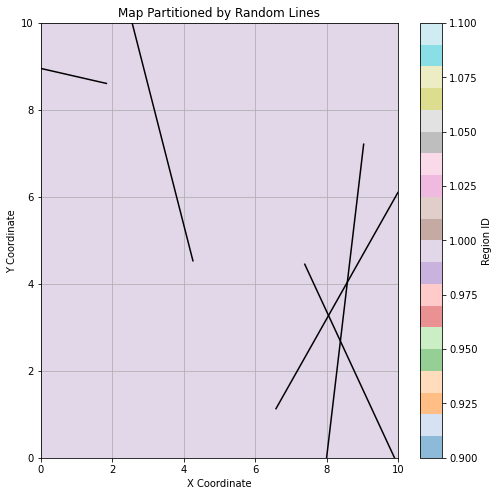

In [17]:
def plot_regions(region_polygons, lines=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    patches = []
    colors = []
    for region_id, polygon in region_polygons.items():
        mpl_poly = MplPolygon(list(polygon.exterior.coords), True)
        patches.append(mpl_poly)
        colors.append(region_id)
    p = PatchCollection(patches, cmap=plt.cm.get_cmap('tab20'), alpha=0.5)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    # Plot the random lines
    if lines:
        for line in lines:
            x, y = line.xy
            ax.plot(x, y, color='black')
    
    plt.xlim(map_bounds.bounds[0], map_bounds.bounds[2])
    plt.ylim(map_bounds.bounds[1], map_bounds.bounds[3])
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Map Partitioned by Random Lines')
    plt.colorbar(p, ax=ax, label='Region ID')
    plt.grid(True)
    plt.show()

# Visualize the regions and lines
plot_regions(region_polygons, random_lines)


In [35]:
d = {}
d['a'] = 1
del d['a']
d

{}

In [36]:
s = set()
s.add(1)
s.remove(1)

In [40]:
from collections import deque

In [54]:
q = deque()
q.append(1)
q.appendleft(2)
print(q)
q.popleft()

deque([2, 1])


2

In [47]:
from collections import defaultdict
d = defaultdict(list)
d[1].append(2)
d

defaultdict(list, {1: [2]})

In [50]:
import heapq
q = []
heapq.heappush(q,1)
heapq.heappush(q,5)
heapq.heappush(q,2)
heapq.heappush(q,4)
heapq.heappush(q,1)
heapq.heappop(q)

1

In [53]:
import copy
a = [1,2,3,4,5]
b = copy.copy(a)
a[0] = 10
b

[1, 2, 3, 4, 5]

In [59]:
def can_be_segmented(word, wordDict):
    
    num_possible = 0
    list_segmentation = []
    
    if word in wordDict:
        num_possible += 1

    for i in range(len(s)-1):
        prefix = s[:i+1]
        suffix = s[i+1:]
        
        if prefix in wordDict:
            suffix_segment = can_be_segmented(suffix, wordDict)
            if suffix_segment[0]:
                num_possible += suffix_segment[0]
                for l in suffix_segment[1]:
                    list_segmentation.append([prefix]+l)
    
    return [num_possible, list_segmentation]

# Example usage
s = "applepineapple"
wordDict = ["apple", "pine", "pineapple"]

result = can_be_segmented(s, wordDict)
print(result)


: 